# SYRIATEL CUSTOMER CHURN PREDICTION PROJECT

**This project aims to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. The project entails data preprocessing, analysis, model selection, and evaluation to achieve accurate and actionable predictions.**

## BUSINESS OVERVIEW

Customer churn, or customer attrition, refers to customers ceasing to do business with a company, often by switching to competitors or stopping services altogether. For companies like SyriaTel, churn directly affects revenue and profitability, making it essential to monitor and address churns proactively. Reducing churn is vital for retaining customers, sustaining growth, and remaining competitive in the market.

Detecting churn involves processes like analyzing customer behavior to identify signs such as reduced usage, complaints, or payment changes. While modern machine learning techniques improve accuracy, challenges like class imbalances and evolving customer behaviors complicate the process. External factors, such as market conditions and competitor actions, further influence customer decisions, requiring businesses like SyriaTel to adapt their strategies continuously.

To tackle this project, a structured approach is needed. This includes data preprocessing, feature engineering, and training machine learning models to identify at-risk customers. By leveraging actionable insights from these models, SyriaTel can implement targeted retention strategies, such as personalized offers and enhanced customer service, to reduce churn, improve customer satisfaction, and support long-term growth.


###### PROBLEM STATEMENT:
SyriaTel faces significant revenue loss due to customer churn but lacks a data-driven approach to proactively identify at-risk customers. This project aims to develop a machine learning model to predict churn, uncover contributing factors, and provide actionable insights for targeted retention strategies, helping the company minimize churn and enhance customer loyalty.


###### OBJECTIVES:
- Develop a machine learning classifier to accurately predict customer churn for SyriaTel, categorizing customers as "churn"(True) or "non-churn" (False).
- Utilize logistic regression for probabilistic predictions and feature interpretability.
- Leverage decision trees for capturing nonlinear patterns and generating intuitive decision rules.
- Evaluate model performance using precision, recall, F1-score, and AUC-ROC to ensure reliable predictions.
- Support SyriaTel in deploying data-driven strategies to minimize churn and improve customer loyalty.


###### METRICS OF SUCCESS:
To evaluate and compare the performance of the models, the following metrics will be used:
- Precision: Measures the accuracy of predicting churn among all predicted churners, ensuring minimal false positives.
- Recall (Sensitivity): Captures the ability to identify all actual churners, minimizing false negatives.
- F1-Score: Balances precision and recall, providing a single metric for performance on imbalanced data.
- AUC-ROC: Assesses the model’s ability to distinguish between churners and non-churners across all thresholds.
These metrics ensure the chosen model performs well on the dataset, balances key trade-offs, and generalizes effectively to unseen data

## DATA UNDERSTANDING

This section explores the dataset's source, structure, and contents to ensure its relevance and credibility. We will examine the columns and rows to understand the variables and their significance for predicting customer churn.

##### DATA SOURCE:
The dataset used in this project is sourced from Kaggle, titled "Churn in Telecoms." It's a  csv file that contains information on customer demographics, service usage, and other features to predict telecom churn. You can access it [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

#### UNDERSTANDING ROWS & COLUMNS IN THE DATASET

In [1]:
#Import the libraries needed for this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
#LOAD THE DATASET
df = pd.read_csv('bigml.csv.csv')
df.shape

(3333, 21)

The dataset has 3333 rows (entries) and 21 columns

In [3]:
#MORE INFO ABOUT THE DATASET
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset consists of 3,333 customer records and 21 columns, including features like customer demographics, service usage, call minutes, charges, and calls to customer service. The key column is **churn**, which indicates whether a customer has stopped using the service. The data is complete with no missing values (we'll confirm this later), providing a solid foundation for analysis and predicting churn based on usage patterns and other factors. Overall, this looks like a high quality dataset. 


The data types for this dataset are mainly numerical(int64 & float64) with a few categorical datatypes(object).


Our target column's datatype is a boolean, showing whether a customer has churned (True) or not (False)

In [4]:
# View of the dataset
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## DATA ANALYSIS

This section contains Exploratory Data Analysis (EDA), where duplicates and missing values are checked. Also, deeper analysis on the different columns is carried out. Visualizations are provided to summarize the findings and better understand what is being investigated.

###### MISSING VALUES

In [5]:
# Check for missing values in the dataset
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Our dataset doesn't have any missing values, which is great!

###### DUPLICATES

In [6]:
# Check for duplicates
df.duplicated().sum()

0

This dataset has no duplicates.

###### CLASS IMBALANCE IN THE TARGET VARIABLE

In [7]:
# Check if our dataset is imbalanced
# Check our target column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

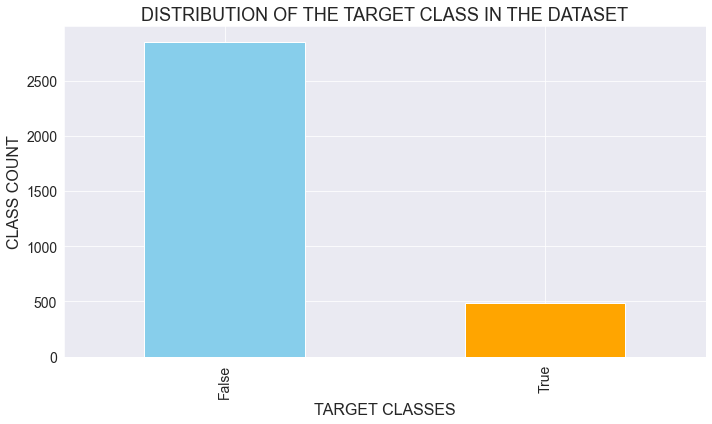

In [8]:
# Visualizing this imbalance
# Create the figure and set the size
plt.figure(figsize=(10, 6))

# Plot
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

# Add title and labels  
plt.title('DISTRIBUTION OF THE TARGET CLASS IN THE DATASET', fontsize=18)
plt.xlabel('TARGET CLASSES', fontsize=16)
plt.ylabel('CLASS COUNT', fontsize=16)


# Customize  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
There's a substantial imbalance in our dataset. 85.5% of the rows belong to the "False" class while 14.5% of rows belong to the "True" class.

This also shows that 15% of customers at SyriaTel have churned. 

###### ANALYSING AREA CODES

In [9]:
# Check which area codes are heavily served by SyriaTel
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Convert the data type of the area code column from integer to categorical, as it serves as an identifier (similar to a phone number) rather than a numerical value.

In [10]:
# Change the dtype of the area code from int to categorical as its an identifier
df['area code'] = df['area code'].astype(object)

In [11]:
# Confirm the change
print(df['area code'].dtypes)

object


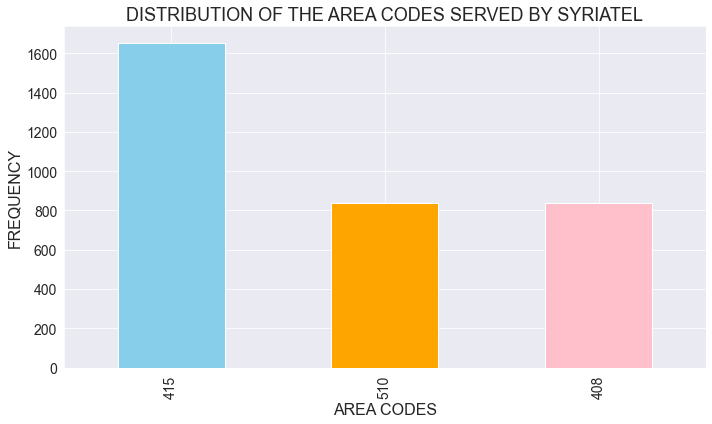

In [12]:
# Visualizing these area codes
# Create the figure and set the size
plt.figure(figsize=(10, 6))

# Plot
df['area code'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'pink'])

# Add labels and title
plt.title('DISTRIBUTION OF THE AREA CODES SERVED BY SYRIATEL', fontsize=18)
plt.xlabel('AREA CODES', fontsize=16)
plt.ylabel('FREQUENCY', fontsize=16)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the visualization above we can observe that area code 415 has the highest number of SyriaTel customers, followed by area code 510, and lastly area code 408. This distribution, however, is most likely influenced by the population size of these areas. 

The organization might want to further investigate the number of users in these areas as well as the population to streamline their services to suit sizes of people they are serving.

###### CHURNS BY STATE

In [13]:
# Analyze churns by state
state_churn = df.groupby('state')['churn'].value_counts().unstack(fill_value=0)
print(state_churn)

churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH        68     10
OK        52      9
OR        67     11
PA        37      8
RI        59      6
SC        46     14
SD        52      8
TN        48      5
TX        54     18
UT        62     10
VA        72      5
VT        65      8
WA        52     14


From the output above we see the number of churns and non-churns for different states.

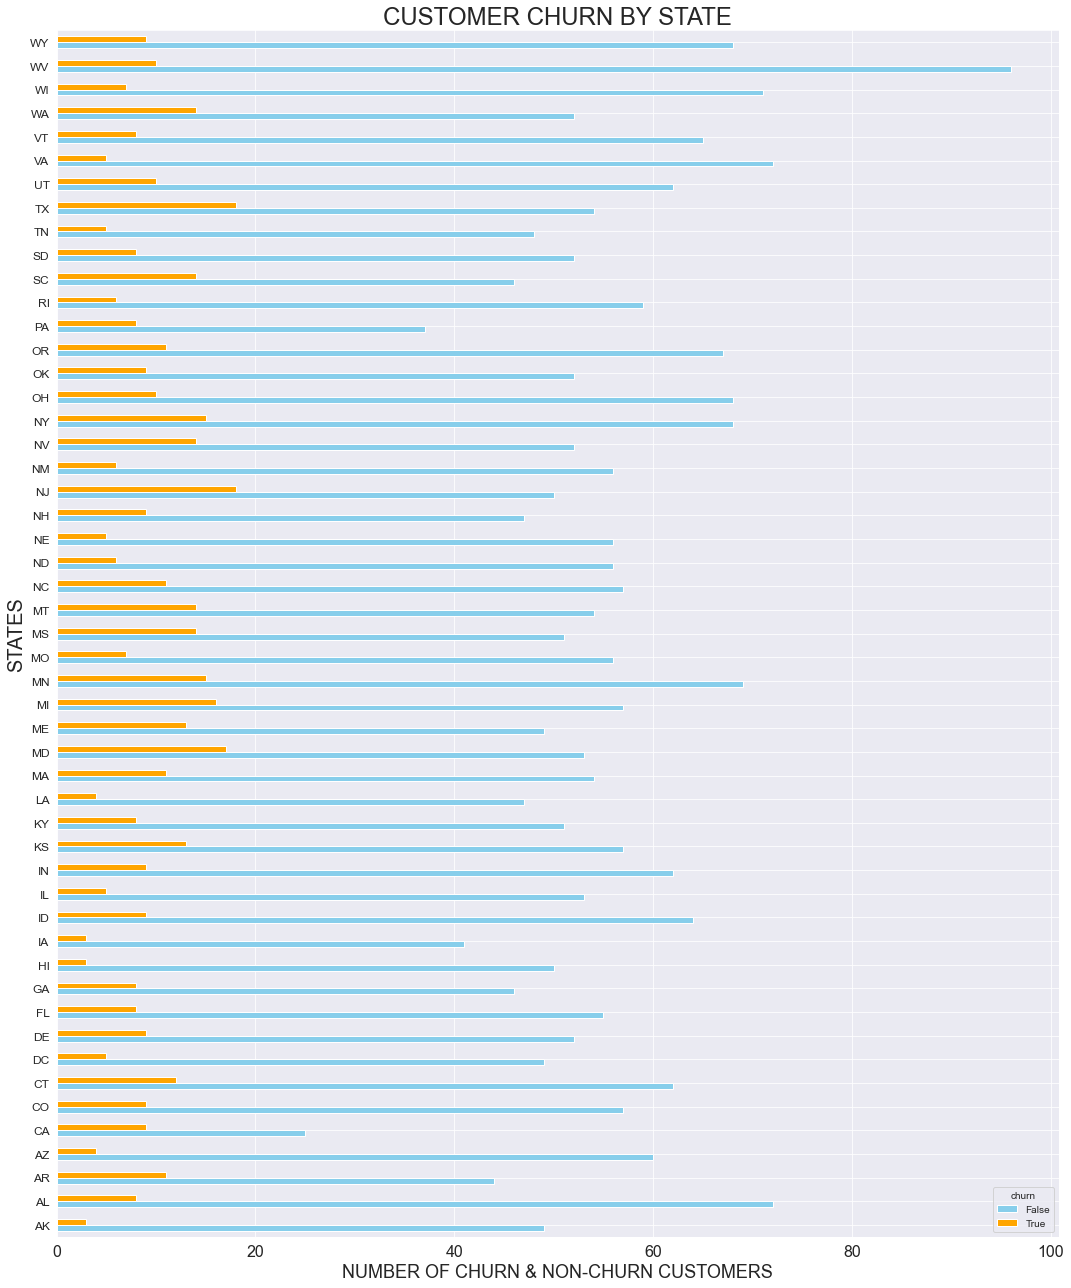

In [14]:
# Visualizing customer churn by "state"
# Create the figure and set size
plt.figure(figsize=(15, 18))

# Plot
state_churn.plot(kind='barh', stacked=False, ax=plt.gca(), color=['skyblue', 'orange'])

# Add title and labels
plt.title('CUSTOMER CHURN BY STATE', fontsize=24)
plt.xlabel('NUMBER OF CHURN & NON-CHURN CUSTOMERS', fontsize=18)
plt.ylabel('STATES', fontsize=20)

# Customize
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the visualization above we can observe that the states WY, VA, and AL have retained the highest number of customers. 

We can also see that the states TX, NJ, and MD have the highest number of churns.

###### TOP 20 STATES WITH THE HIGHEST CHURNS

In [15]:
# Top 20 states with the highest churn.
highest_churn_state = df[df['churn'] == True].groupby('state').size().sort_values(ascending=False).head(20)
highest_churn_state

state
TX    18
NJ    18
MD    17
MI    16
NY    15
MN    15
MS    14
MT    14
WA    14
SC    14
NV    14
ME    13
KS    13
CT    12
NC    11
MA    11
OR    11
AR    11
OH    10
UT    10
dtype: int64

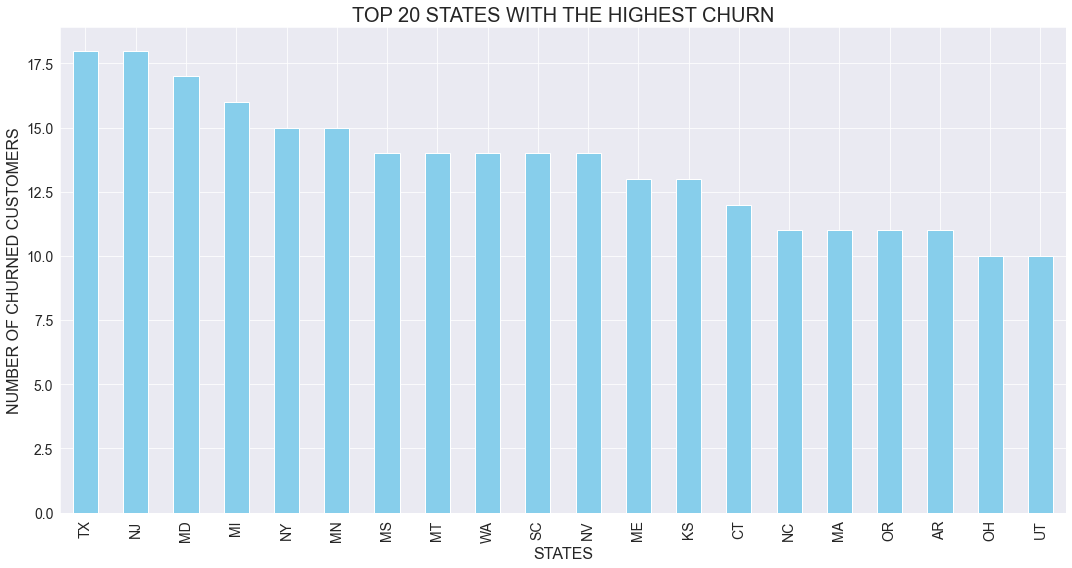

In [16]:
# Visualizing the top 20 states with the highest churns
# Create the figure and set size
plt.figure(figsize=(15, 8))

# Plot
highest_churn_state.plot(kind='bar', color=['skyblue'])

# Add title and labels
plt.title('TOP 20 STATES WITH THE HIGHEST CHURN', fontsize=20)
plt.xlabel('STATES', fontsize=16)
plt.ylabel('NUMBER OF CHURNED CUSTOMERS', fontsize=16)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the visualization above we can observe that TX, NJ, MD, MI,and NY are some of the states with the highest numbers of churns. 

This can be investigated further to determine whether the population size of these states explain the churn numbers. 

###### TOP 20 STATES WITH THE HIGHEST COUNT OF CUSTOMER SERVICE CALLS

In [17]:
# Top 20 states with the highest customer service calls
highest_service_calls= df.groupby('state')['customer service calls'].sum().sort_values(ascending=False).head(20)
highest_service_calls

state
WV    159
NY    142
OR    135
MN    130
VT    127
AL    125
VA    123
ID    122
IN    120
MD    119
MI    119
CO    118
TX    116
NJ    114
CT    112
WY    111
WI    111
MT    111
MS    110
AR    109
Name: customer service calls, dtype: int64

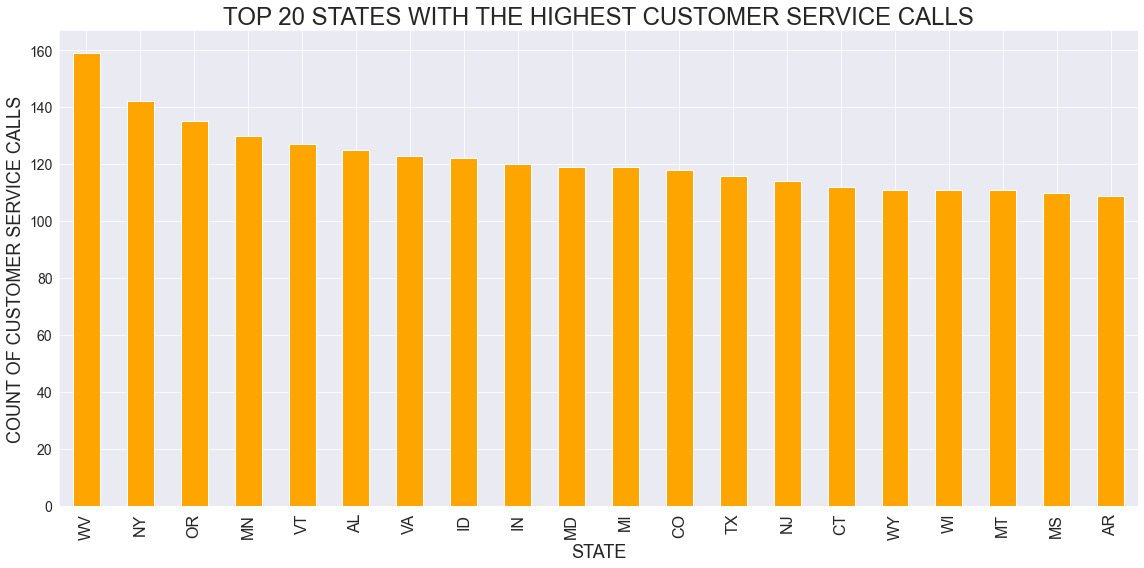

In [18]:
# Visualizing the top 20 states with the highest customer service calls
# Create the figure and set size
plt.figure(figsize=(16, 8))

# Plot
highest_service_calls.plot(kind='bar', color=['orange'])

# Add title and labels
plt.title('TOP 20 STATES WITH THE HIGHEST CUSTOMER SERVICE CALLS', fontsize=24)
plt.xlabel('STATE', fontsize=18)
plt.ylabel('COUNT OF CUSTOMER SERVICE CALLS', fontsize=18)

# Customize
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the visualization above we can see that the states WV, NY, OR, MN, and VT are some of the states with the highest number of customer service calls. We can also spot states that have the highest number of churns are here with the highest number of customer service calls. 

###### STATES WITH THE HIGHEST COUNT OF CHURNS AND CALLS TO CUSTOMER SERVICE

In [19]:
# Investigate whether the states with the highest number of churns also report the highest number of customer service calls.
# Find the common states (intersection) between the highest churn states and highest customer service calls states
common_states = highest_churn_state.index.intersection(highest_service_calls.index)
common_states

Index(['TX', 'NJ', 'MD', 'MI', 'NY', 'MN', 'MS', 'MT', 'CT', 'OR', 'AR'], dtype='object', name='state')

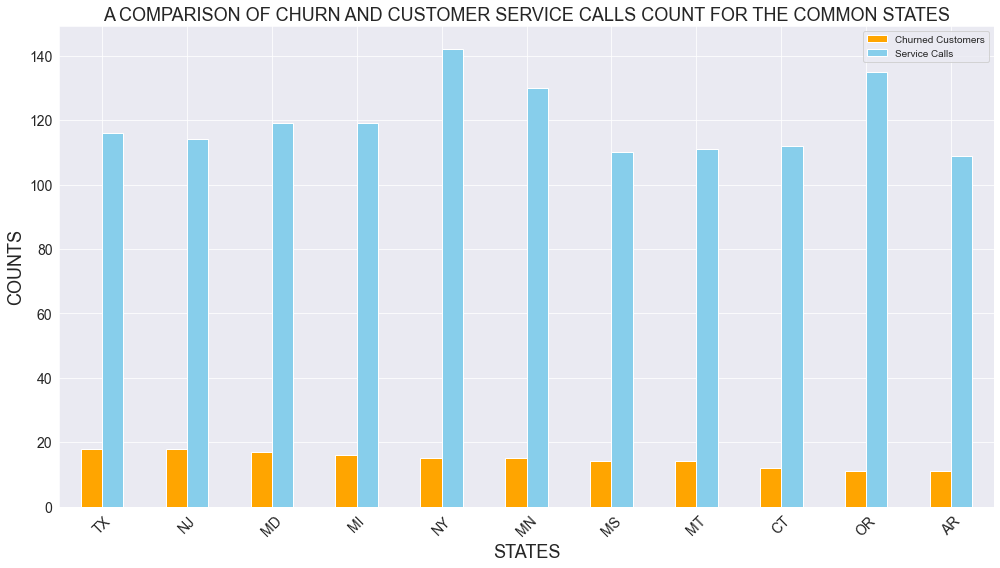

In [20]:
# Visualizing this intersection

# Create a new dataframe for common states with both churn and customer service call data
common_state_data = pd.DataFrame({'Churned Customers': highest_churn_state[common_states],
                                  'Service Calls': highest_service_calls[common_states]})

# Plot
common_state_data.plot(kind='bar', figsize=(14, 8), color=['orange', 'skyblue'])

# Add title and labels
plt.title('A COMPARISON OF CHURN AND CUSTOMER SERVICE CALLS COUNT FOR THE COMMON STATES', fontsize = 18)
plt.xlabel('STATES', fontsize = 18)
plt.ylabel('COUNTS', fontsize = 18)

# Customize
plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the output and visualization above we can observe the states that had the highest number of churned customers and also had the highest number of customer service calls.

SyriaTel can use this information to investigate their service in these states. What could be causing these numerous calls to customer service? Could this be a reason why the churn rates in these states are high? Again, could these numbers be high simply due to the population size of these states?

###### NUMBERS OF CALLS MADE DURING DIFFERENT TIMES

In [21]:
# What times do people mostly use the services
# Summing up the calls for each type
calls_summary = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum()
print(calls_summary)

total day calls      334752
total eve calls      333681
total night calls    333659
total intl calls      14930
dtype: int64


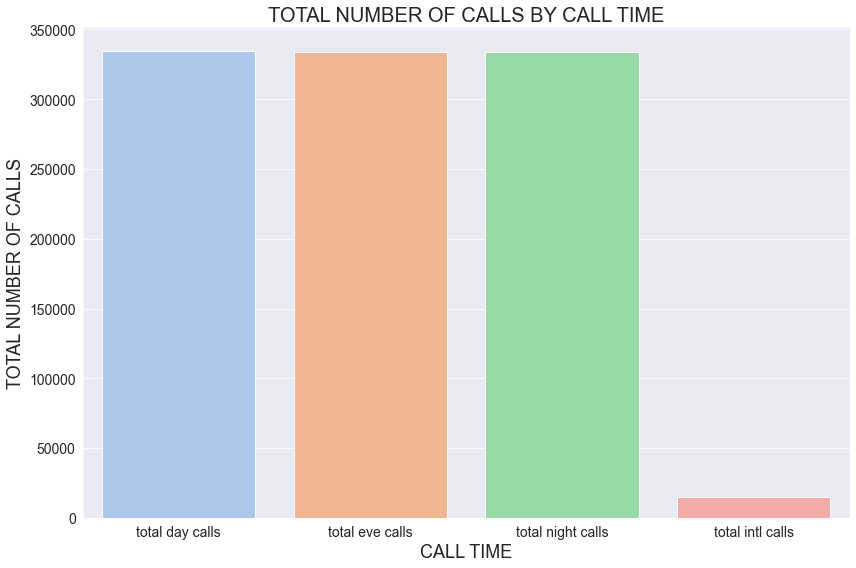

In [22]:
# Visualizing what times do people mostly use the services
# Create the figure and set size
plt.figure(figsize=(12, 8))

# Plot
sns.barplot(x=calls_summary.index, y=calls_summary.values, palette='pastel')

# Add title and labels
plt.title('TOTAL NUMBER OF CALLS BY CALL TIME', fontsize=20)
plt.xlabel('CALL TIME', fontsize=18)
plt.ylabel('TOTAL NUMBER OF CALLS', fontsize=18)

# Customise
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the output and visualization above we can observe that there is no substatial difference between the number of calls made throughout the day. 

However, we can see the huge difference between the local total number of calls and the international calls. 

SyriaTel can use this information to investigate further why the international calls made through their services are not as high. Can they improve the international plan for their customers?

In [23]:
# Summing up the minutes for each type
minutes_summary = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum()
print(minutes_summary)

total day minutes      599190.4
total eve minutes      669867.5
total night minutes    669506.5
total intl minutes      34120.9
dtype: float64


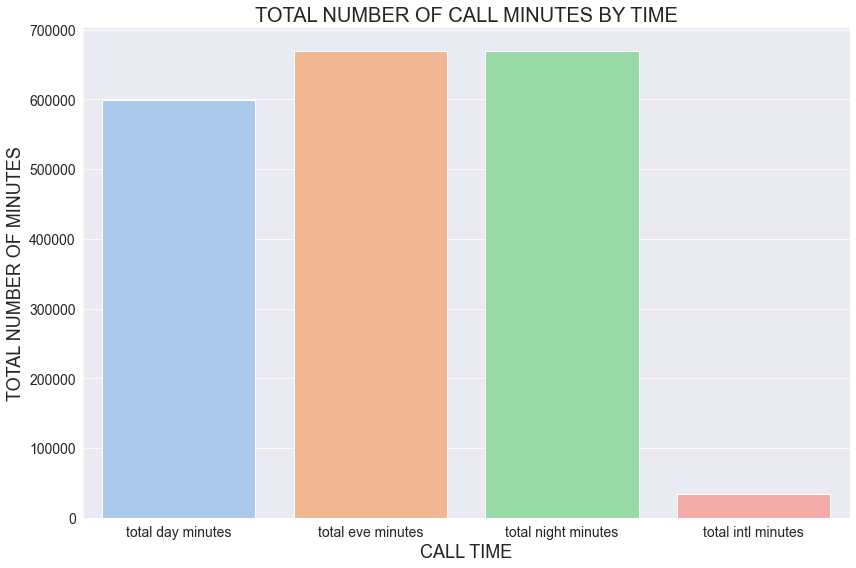

In [24]:
# Visualizing what times do people mostly use the services
# Create the figure and set size
plt.figure(figsize=(12, 8))

# Plot
sns.barplot(x=minutes_summary.index, y=minutes_summary.values, palette='pastel')

# Add title and labels
plt.title('TOTAL NUMBER OF CALL MINUTES BY TIME', fontsize=20)
plt.xlabel('CALL TIME', fontsize=18)
plt.ylabel('TOTAL NUMBER OF MINUTES', fontsize=18)

# Customise
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### CHURN RATE BY INTERNATIONAL PLAN

In [25]:
# Churn rate by international plan
churn_by_intl_plan = df.groupby('international plan')['churn'].value_counts().head(20)
churn_by_intl_plan

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
Name: churn, dtype: int64

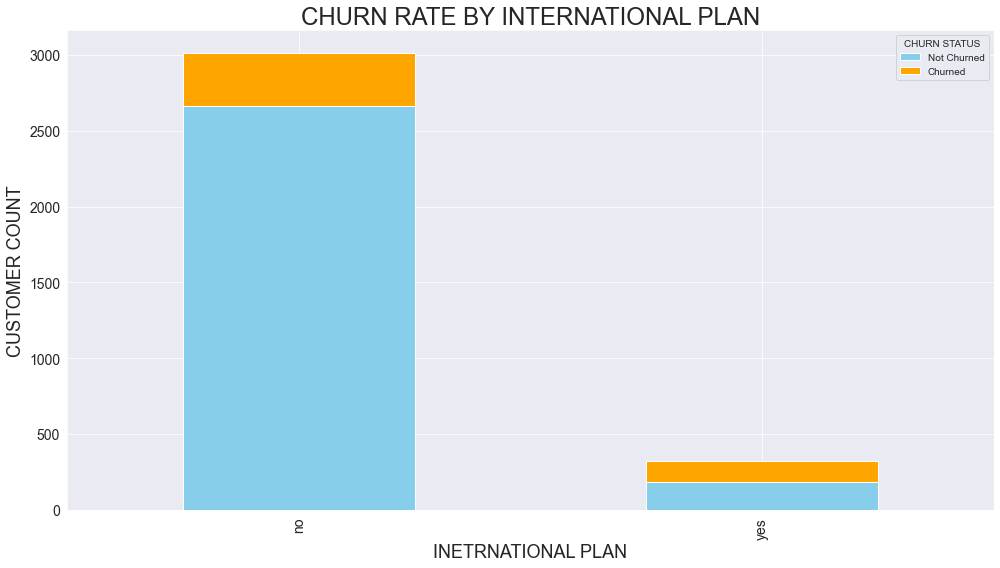

In [26]:
# Visualizing churn rate by international plan
# Prepare the data for visualization
churn_by_intl = (df.groupby(['international plan', 'churn']).size().unstack(fill_value=0))

# Create the figure and set size
plt.figure(figsize=(14, 8))

# Plot
churn_by_intl.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())

# Add title and labels
plt.title('CHURN RATE BY INTERNATIONAL PLAN', fontsize=24)
plt.xlabel('INETRNATIONAL PLAN', fontsize=18)
plt.ylabel('CUSTOMER COUNT', fontsize=18)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Not Churned', 'Churned'], title='CHURN STATUS')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the analysis and visualization above, we acn observe that the majority of SyriaTel customers don't have an international plan. Also the churn rate is higher among those without an international plan compared to those with one. This could also be contributed by the fact that most of the customers are in the 'no international plan' class. 

###### CHURN RATE BY VOICEMAIL PLAN

In [27]:
# Churn rate by voicemail plan
churn_by_vm_plan = df.groupby('voice mail plan')['churn'].value_counts().head(20)
churn_by_vm_plan

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
Name: churn, dtype: int64

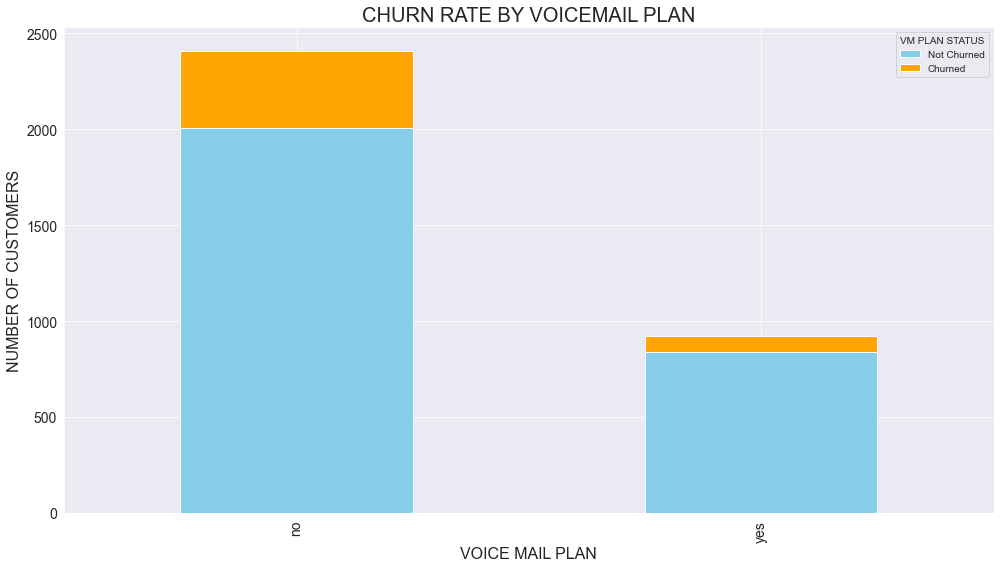

In [28]:
# Visualizing churn rate by voicemail plan
# Prep the data for visualization
churn_by_vm = (df.groupby(['voice mail plan', 'churn']).size().unstack(fill_value=0))


# Create the figure and set size
plt.figure(figsize=(14, 8))

# Plot
churn_by_vm.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())

# Add title and labels
plt.title('CHURN RATE BY VOICEMAIL PLAN', fontsize=20)
plt.xlabel('VOICE MAIL PLAN', fontsize=16)
plt.ylabel('NUMBER OF CUSTOMERS', fontsize=16)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Not Churned', 'Churned'], title='VM PLAN STATUS')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the analysis and visualization above, we can observe that the majority of SyriaTel customers don't have a voicemail plan. Also the churn rate is higher among those without a voicemail plan compared to those with one but this could also be due to the fact that most of the customers don't have the plan.

###### CHURN RATE BY AREA CODES

In [29]:
# Churn rate by area codes
churn_by_area_code = df.groupby('area code')['churn'].value_counts().head(20)
churn_by_area_code

area code  churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: churn, dtype: int64

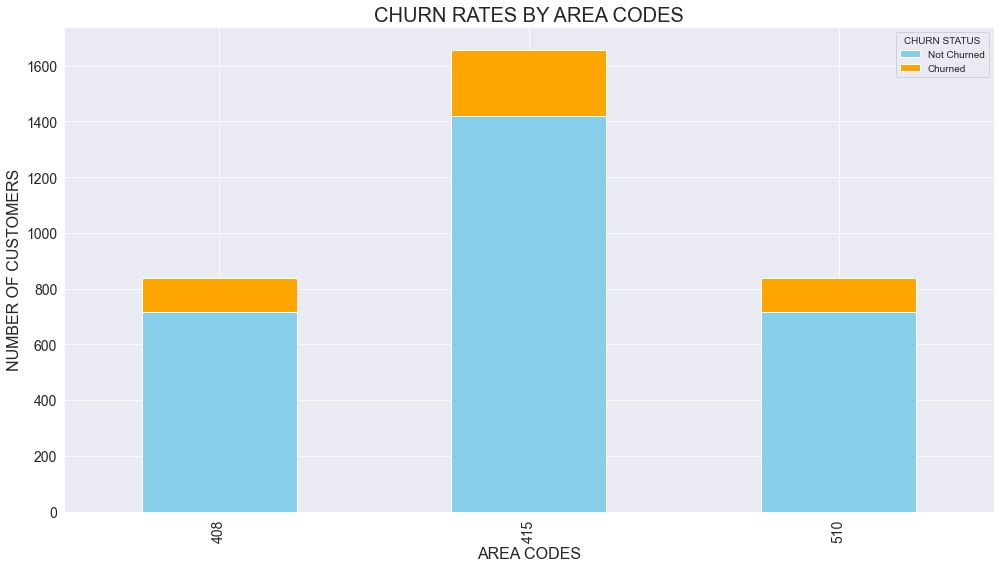

In [30]:
# Visualising churn rate by area codes
# Prep the data for visualization
churn_by_area = (df.groupby(['area code', 'churn']).size().unstack(fill_value=0))


# Create the figure and set size
plt.figure(figsize=(14, 8))

# Plot
churn_by_area.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())

# Add title and labels
plt.title('CHURN RATES BY AREA CODES', fontsize=20)
plt.xlabel('AREA CODES', fontsize=16)
plt.ylabel('NUMBER OF CUSTOMERS', fontsize=16)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Not Churned', 'Churned'], title='CHURN STATUS')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the analysis and visualization above, we can observe that the majority of SyriaTel customers are in area code 415. Also the churn rate is higher in this area code compared to other area codes, however, this could also be due to the fact that SyriaTel customers are mostly located in area 415.

###### ACCOUNT LENGTH OF CHURNED CUSTOMERS

In [31]:
# Analyze the average time it takes a customer to churn
churned = df.loc[df['churn'] == True]
time_before_churn = churned['account length'].mean()
print(f'Average account length of churned customers: {time_before_churn:.2f} days')

Average account length of churned customers: 102.66 days


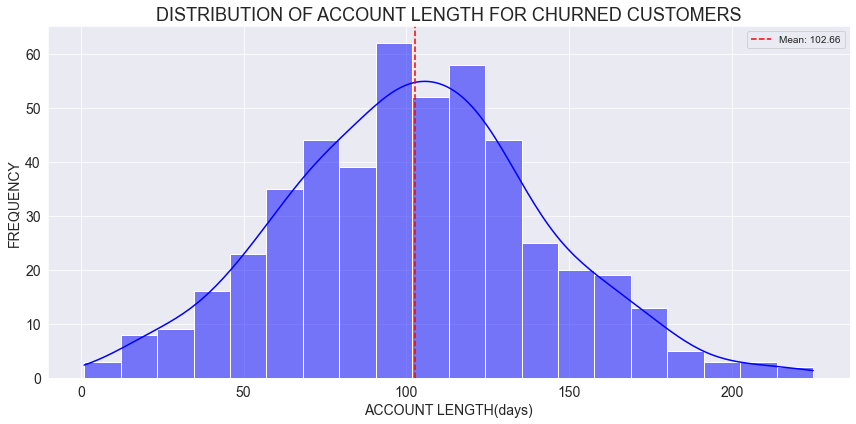

In [32]:
# Visualising the distribution of account length of churned customers
# Filter data for churned customers
churned = df.loc[df['churn'] == True]

# Create the figure and set size
plt.figure(figsize=(12, 6))

# Plot
sns.histplot(churned['account length'], kde=True, color='blue', bins=20)
plt.axvline(churned['account length'].mean(), color='red', linestyle='--', label=f'Mean: {time_before_churn:.2f}')

# Add title and labels
plt.title('DISTRIBUTION OF ACCOUNT LENGTH FOR CHURNED CUSTOMERS', fontsize=18)
plt.xlabel('ACCOUNT LENGTH(days)', fontsize=14)
plt.ylabel('FREQUENCY', fontsize=14)

# Customize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Observation:
From the analysis and visualization above, we can observe that for churned customers, it took an average of 102 days before they churned.

Further investigation can be carried out to find out what's happening around this time that might be contributing to churns.

## SUMMARY FINDINGS IN EDA AND DATA ANALYSIS

Key Insights from the Analysis:
- **Customer Retention Duration**: On average, it took approximately 102 days (3.4 months) for a churned customer to stop using SyriaTel's services.

- **Call Patterns**: The total number of local calls made across different times of the day is relatively consistent, whereas the number of international calls is significantly lower.

- **Service Plan**: The majority of SyriaTel customers do not subscribe to international or voicemail plans.

- **Churn by Area Code**: Area code 415 reports the highest number of churns, but it is also the area where SyriaTel services are most utilized.

- **State-Level Trends**: States such as TX, NJ, NY, MD, CT, OR, and MI exhibit both the highest number of churns and the highest volume of customer service calls.

- **Class Imbalance**: The dataset is imbalanced, with 85% of the target class labeled as "False" (not churned) and only 15% labeled as "True" (churned).




### **DECISION AFTER DATA ANALYSIS**
From the analysis carried out, these are the conclusions about the data that'll be used to build the classifier to help predict churn among SyriaTel customers.
1. The phone number column is an identifier. It doesn't provide any useful predictive value about churn. So it'll be dropped.
2. All the other columns will go through feature selection and a test for multicollinearity to decide which ones are kept for modeling. 

- unsure about which features to retain, you can leave this task to feature selection methods. These methods ensure that only the most useful features are kept for the model.

3. The columns area code and state are also identifiers, however, whether they'll be dropped or kept will also be decided by feature selection.
4. Encoding will be performed for the state, area code, churn, international plan, and voice mail plan columns as they are categorical variables.
5. A test for multicollinearity will also be performed to further decide columns to drop for an effective model.

## DATA PREPROCESSING FOR MODELING
**(DATASET-LEVEL PREPROCESSING)** - preprocessing that doesn't alter the training set

In [33]:
# encoding columns 
# multicollinearity
# feature selection
# dealing with imbalance
# check if to Normalize/standardize/scale numerical features, especially if needed for Logistic Regression
# investigate whether the relationships are linear / non linear

In [34]:
# Dropped the phone number column as it's just an identifier
df.drop('phone number', axis= 1, inplace = True)

##### IMPORTING THE LIBRARIES NEEDED FOR MODELING

In [35]:
#import the necessary libraries needed for the data prep for modeling and for modeling
import itertools
import warnings
warnings.filterwarnings("ignore")

# To split the dataset into train and test sets
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import cross_val_score

# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression    
from sklearn.linear_model import Ridge, Lasso

# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier        

# For encoding the categorical and target columns
from sklearn.preprocessing import OneHotEncoder 

# For scaling the data
from sklearn.preprocessing import StandardScaler

# For feature selection during modeling(logistic regression)
from sklearn.feature_selection import RFE

# To apply transformations to specific columns
from sklearn.compose import ColumnTransformer          

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# For handling class imbalance
from imblearn.over_sampling import SMOTE, ADASYN

##### DEFINING THE TARGET AND THE FEATURES OF THE MODEL

In [36]:
# Define the variables (the target and the features)
X = df.drop('churn', axis=1)
y = df['churn']

##### SPLITTING THE DATASET INTO TRAINING AND TEST SETS

To prevent data leakage and leave the testing set untouched to simulate real-world data, I split the dataset first before further preprocessing and feature selection.

Used 80% of the dataset for training the algorithm and 20% for testing the model's performance.

I used the **'stratify'** parameter to ensure that the distribution of the target class in the train and test sets remain consistent with the original dataset, since our dataset is highly imbalanced.

In [37]:
# Splitting the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, test_size=0.2, random_state= 42)

In [38]:
# Brief view of the X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
3286,OH,106,415,no,yes,30,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,8,3.54,0
86,IN,94,408,no,no,0,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,5,2.16,4
1349,KY,71,510,no,yes,22,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,3,1.51,2
1649,NH,130,408,no,no,0,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,4,2.81,0
3000,NJ,87,510,no,no,0,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,4,3.92,3


In [39]:
# Brief view of the X_test
X_test.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
601,MA,62,415,yes,no,0,159.7,86,27.15,197.5,76,16.79,121.6,105,5.47,13.9,6,3.75,0
2050,MT,121,408,no,no,0,213.2,79,36.24,120.7,116,10.26,244.4,102,11.00,7.5,4,2.03,1
3200,CT,100,510,yes,no,0,107.2,98,18.22,86.8,122,7.38,156.2,117,7.03,9.7,4,2.62,1
1953,WA,137,408,no,no,0,208.8,120,35.50,225.3,100,19.15,221.6,130,9.97,11.1,5,3.00,0
1119,OK,189,415,no,no,0,208.3,106,35.41,236.7,123,20.12,179.1,120,8.06,11.3,5,3.05,3


In [40]:
# Brief view of the y_train
y_train.head()

3286    False
86       True
1349    False
1649    False
3000    False
Name: churn, dtype: bool

In [41]:
# Brief view of the y_test
y_test.head()

601      True
2050    False
3200    False
1953    False
1119    False
Name: churn, dtype: bool

###### ONE-HOT ENCODING THE CATEGORICAL VARIABLES

One-hot encoded the categorical columns since algorithms 'understand' numerical values only.

Ensure the fitting was done only on the training set, but transformation was done on both the training and test sets.

The target column contains boolean values so encoding is straightforward. Used pandas .map() for this to assign True=1 and False=0

In [42]:
# Encoding the target column (y)
# Target column is a boolean (True/False) values.To encode, I simply mapped the column to convert True -> 1 and False -> 0.
# Used pandas map() funct.

# Encode training set
y_train_final = y_train.map({True:1, False:0})

# Encode testing set
y_test_final = y_test.map({True:1, False:0})

In [43]:
# Encoding the categorical feature columns (X)
# Drop first to avoid the dummy variable trap
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the training set.
# Fitting the training data only inorder to use the training data to determine the unique categories for each feature.
X_train_ohe = ohe.fit_transform(X_train[['state', 'area code', 'international plan', 'voice mail plan']])

# Transform only the testing set
X_test_ohe = ohe.transform(X_test[['state', 'area code', 'international plan', 'voice mail plan']])

Below, I converted the encoded columns into dataframes with appropriate indices and column names.

In [44]:
# Get column names for the encoded columns
ohe_feature_names = ohe.get_feature_names(['state', 'area code', 'international plan', 'voice mail plan'])

# Convert encoded columns to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test.index)

Concantenated the now encoded columns with the rest of the dataset.

In [45]:
# Combine the encoded features with the other numerical columns in the dataset
X_train_encd = pd.concat([X_train_encoded_df, X_train.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)], axis=1)
X_test_encd = pd.concat([X_test_encoded_df, X_test.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)], axis=1)

In [46]:
# Confirm the encoding
print(X_train_encd.head()) # ohe training features
print('\n')
print(y_train_final[:5]) # ohe training features

      state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  \
3286       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
86         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1349       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1649       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3000       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      state_DE  state_FL  state_GA  ...  total eve minutes  total eve calls  \
3286       0.0       0.0       0.0  ...              222.2              109   
86         0.0       0.0       0.0  ...              155.0              101   
1349       0.0       0.0       0.0  ...              163.0              105   
1649       0.0       0.0       0.0  ...              193.3              110   
3000       0.0       0.0       0.0  ...              127.5               86   

      total eve charge  total night minutes  total night

In [47]:
X_train_encd.columns

Index(['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'area code_415', 'area code_510',
       'international plan_yes', 'voice mail plan_yes', 'account length',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night

In [48]:
# Confirm that all columns in our training data are numerical
# Filter out the categorical columns
cat_train_columns = X_train_encd.select_dtypes(exclude=['number']).columns

if len(cat_train_columns) == 0:
    print("All columns in the training data are numerical.")
else:
    print("These columns aren't numeric:")
    print(cat_train_columns)


All columns in the training data are numerical.


In [49]:
# Confirm that all columns in our testing data are numerical
# Filter out the categorical columns
cat_test_columns = X_test_encd.select_dtypes(exclude=['number']).columns

if len(cat_test_columns) == 0:
    print("All columns in the test data are numerical.")
else:
    print("These columns aren't numeric:")
    print(cat_test_columns)


All columns in the test data are numerical.


In [50]:
# Confirm the y_train dtype
y_train_final.dtypes

dtype('int64')

In [51]:
# Confirm the encoding
print(y_train_final.unique())

[0 1]


In [52]:
# Confirm the y_test dtype
y_test_final.dtypes

dtype('int64')

In [53]:
# Confirm the encoding
print(y_test_final.unique())

[1 0]


##### SCALING THE DATA (Standardization)

Keep in mind, For classification problems (e.g., logistic regression or decision trees), the target variable is categorical (e.g., 0 or 1 for churn). Scaling it would distort its meaning.


In [54]:
# Standardizing the numerical columns 
# Initialize the scaler
scaler = StandardScaler()

# Fit (only on trainng data) and tranform the training data
X_train_scaled = scaler.fit_transform(X_train_encd)

# Transform the test set using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test_encd)

The result of this scaling is Numpy array, so we need to convert the scaled data to dataframes.

In [55]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encd.columns, index=X_train_encd.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encd.columns, index=X_test_encd.index)

##### CHECKING FOR MULTICOLLINEARITY (VIF)
check for multicollinearity before scaling, because high correlation between features can lead to issues in regression models 

to avoid any unnecessary complications when scaling and modeling

We'll now calculate VIF on the scaled training data (X_train_scaled_df) since VIF calculations should only be performed on the training dataset.
The Variance Inflation Factor (VIF) measures multicollinearity among independent variables, not between features and the target. Each VIF value represents how much the variance of a feature is inflated due to correlation with other features.

 VIF < 5: Indicates low or acceptable multicollinearity.
    VIF ≥ 5: Indicates moderate multicollinearity; consider further investigation.
    VIF ≥ 10: Indicates severe multicollinearity; you should consider removing or combining features.
    

**Best of Both Worlds**
You can combine both approaches:

Use VIF analysis to drop a few features with the highest multicollinearity to simplify the data.
Then, apply Logistic Regression with regularization (Lasso or Ridge) to fine-tune feature importance and handle any remaining multicollinearity.

In [56]:
# Check for multicollinearity with the vif method

# Import the library needed
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Create a vif dataframe that will store the vif results
vif_df = pd.DataFrame()


# Add feature columns names to this df (from the scaled df)
vif_df['Features'] = X_train_scaled_df.columns


# Calculate the vif for each column (feature) and put the score in the 'VIF' column in the vif df
vif_df['VIF'] = [variance_inflation_factor(X_train_scaled_df.values, i)
                for i in range(X_train_scaled_df.shape[1])]

"""X_train_scaled_df.values: Converts the scaled DataFrame to a NumPy array, as variance_inflation_factor works with arrays.
for i in range(X_train_scaled_df.shape[1]): Iterates over each column (feature) in the DataFrame.
variance_inflation_factor(X_train_scaled_df.values, i): Calculates the VIF for the 𝑖𝑡ℎ feature. 
A high VIF indicates multicollinearity."""

print(vif_df.sort_values(by='VIF', ascending=False))

                  Features           VIF
56       total day minutes  1.064855e+07
58        total day charge  1.064854e+07
61        total eve charge  2.252244e+06
59       total eve minutes  2.252231e+06
62     total night minutes  6.355659e+05
..                     ...           ...
57         total day calls  1.028460e+00
68  customer service calls  1.025810e+00
63       total night calls  1.024541e+00
54          account length  1.023379e+00
66        total intl calls  1.023334e+00

[69 rows x 2 columns]


In [57]:
vif_df

,Features,VIF
0,state_AL,2.556376
1,state_AR,2.072709
2,state_AZ,2.351091
3,state_CA,1.674979
4,state_CO,2.333731
...,...,...
64,total night charge,635562.646604
65,total intl minutes,70710.289520
66,total intl calls,1.023334
67,total intl charge,70709.978987


In [58]:
# Filter features with high VIF
high_vif = vif_df[vif_df['VIF'] > 10]  # Threshold for high VIF
print("Features with high VIF:")
print(high_vif)

Features with high VIF:
                 Features           VIF
53    voice mail plan_yes  1.218280e+01
55  number vmail messages  1.217342e+01
56      total day minutes  1.064855e+07
58       total day charge  1.064854e+07
59      total eve minutes  2.252231e+06
61       total eve charge  2.252244e+06
62    total night minutes  6.355659e+05
64     total night charge  6.355626e+05
65     total intl minutes  7.071029e+04
67      total intl charge  7.070998e+04


In [59]:
# Filter features with low VIF
low_vif = vif_df[vif_df['VIF'] < 10]  # Threshold for high VIF
print("Features with low VIF:")
print(low_vif)
print('\n')
print(f'Number of low vif features: {len(low_vif)}')

Features with low VIF:
                  Features       VIF
0                 state_AL  2.556376
1                 state_AR  2.072709
2                 state_AZ  2.351091
3                 state_CA  1.674979
4                 state_CO  2.333731
5                 state_CT  2.379547
6                 state_DC  2.080227
7                 state_DE  2.214619
8                 state_FL  2.350148
9                 state_GA  1.966979
10                state_HI  2.026740
11                state_IA  1.797385
12                state_ID  2.424377
13                state_IL  2.158161
14                state_IN  2.342962
15                state_KS  2.284022
16                state_KY  2.166992
17                state_LA  2.004428
18                state_MA  2.295891
19                state_MD  2.333651
20                state_ME  2.263714
21                state_MI  2.356445
22                state_MN  2.491991
23                state_MO  2.259552
24                state_MS  2.214930
25             

In [60]:
# Drop high VIF features on the training set
X_train_final = X_train_scaled_df.drop(columns=high_vif['Features'])
print("Remaining Features after dropping:")
print(X_train_final.columns)
print('\n')
print(len(X_train_final.columns))

Remaining Features after dropping:
Index(['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'area code_415', 'area code_510',
       'international plan_yes', 'account length', 'total day calls',
       'total eve calls', 'total night calls', 'total intl calls',
       'customer service calls'],
      dtype='object')


59


In [61]:
# Drop high VIF features in the test set
X_test_final = X_test_scaled_df.drop(columns=high_vif['Features'])
print("Remaining Features after dropping:")
print(X_test_final.columns)
print('\n')
print(X_test_final.shape)

Remaining Features after dropping:
Index(['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'area code_415', 'area code_510',
       'international plan_yes', 'account length', 'total day calls',
       'total eve calls', 'total night calls', 'total intl calls',
       'customer service calls'],
      dtype='object')


(667, 59)


UP UNTIL THIS POINT, THE TRAINING SET IS THE **X_train_final** and **y_train_final**, AND THE TESTING SET IS THE **X_test_final** and **y_test_final**

###### FEATURE SELECTION - EMBEDDED METHOD (Lasso)
Feature selection should be done after the data is prepared (imbalanced handled, multicollinearity checked, and features scaled), as it helps improve model performance and reduces overfitting. By this point, you've already dealt with data issues, so selecting the most important features will be more effective.

This is an additional step to further refine the features and improve your logistic regression model's performance. Feature selection can help identify the most relevant features for predicting the target variable. 

Futher feature selection will be done during modeling (RFE/Lasso/Ridge). At this stage selection fromvif will surfice.

##### DEALING WITH THE CLASS IMBALANCE
Now that your feature set is well-prepared, you should address the class imbalance before starting your modeling. Since class imbalance affects model performance significantly (especially in logistic regression), tackling it now ensures that your model training is fair and effective.

The key principle is that you should handle dataset-level preprocessing steps like multicollinearity checks, standardization, and feature selection before addressing class imbalance. 
Imbalance handling (like SMOTE or class weighting) alters the training dataset but does not affect the testing dataset, which must remain untouched to simulate real-world scenarios. Therefore, preprocessing must be applied before the training set is modified by oversampling, undersampling, or weighting.

can address class imbalance and perform feature selection during modeling in logistic regression, and your model can still be effective. 

Logistic regression has a built-in parameter, class_weight='balanced', which adjusts the weights of each class inversely proportional to their frequencies. This ensures the algorithm treats both classes fairly without requiring you to oversample or undersample the data.

How it Works:
For the minority class (e.g., churned customers), the model assigns a higher penalty for misclassification.
For the majority class (e.g., non-churned customers), the penalty is lower.
This approach avoids modifying the dataset and allows the algorithm to handle imbalance directly.

Feature selection can be seamlessly integrated into logistic regression using techniques like:

Lasso Regularization (L1):

Automatically sets the coefficients of less important features to zero, effectively removing them.
Recursive Feature Elimination (RFE):

Iteratively eliminates the least important features based on their impact on model performance.
Analyzing Coefficients Post-Training:

After training, examine feature coefficients to identify and remove features with negligible impact.


**Combining Both Steps**
When using built-in logistic regression capabilities, you can simultaneously:

Address class imbalance with class_weight='balanced'.
Perform feature selection through L1 regularization or post-training analysis.
This approach:

Simplifies the workflow (fewer preprocessing steps).
Leverages logistic regression's built-in capabilities to streamline the proces

**Effectiveness of This Approach**
By handling class imbalance and feature selection during modeling:

You reduce the need for preprocessing steps.
You ensure the model is balanced and focuses only on meaningful features.
This workflow is efficient and often leads to good model performance while maintaining simplicity. However:

Always validate the model on the test set to ensure it generalizes well to unseen data.
If performance is suboptimal, consider additional steps like hyperparameter tuning or alternative resampling techniques.

## MODELING
MENTION THE MODELS PICKED (logistic reg + dt), then compare performance

HAVE 3 MODELS (baseline, and 2nd and 3rd hyperparameter tuned models)

CLASSIFICATION MODEL (LOGISTIC REG/DECISION TREE)

ENSURE TO INCLUDE PREDICTIVE APPROACH IN ADDITION TO INFERENTIAL

MENTION PREDICTIVE FINDINGS & RECOMMENDATIONS

ITERATIVE APPROACH TO MODELING (build multiple models...check project desc)

JUSTIFY REASONS FOR SELECTING THE MODEL

REFER TO THE METRICS OF SUCCESS MENTIONED EARLIER

In this section, we focus on building and evaluating classification models to predict customer churn. The modeling process employs an iterative approach, progressively refining the models to achieve optimal performance. We begin with a simple logistic regression model as a baseline to establish a point of comparison. This baseline model is then improved through hyperparameter tuning to develop a more robust second version. Finally, we transition to a decision tree model, leveraging its interpretability and flexibility, and fine-tune it for further enhancement.

This approach balances both predictive and inferential objectives. Logistic regression is chosen for its simplicity and statistical interpretability, while the decision tree complements it by offering insights into feature importance and complex decision boundaries. Both models are evaluated on key performance metrics—precision, recall, F1-score, and the AUC-ROC curve—to ensure comprehensive assessment and comparison.

The ultimate goal is to identify the best-performing model that can generalize well to unseen data and provide actionable insights into customer churn. These insights will inform strategic recommendations to stakeholders and guide the next steps in addressing churn. This iterative modeling strategy ensures that each successive model builds upon the lessons learned from the previous one, enabling both accuracy and business relevance in the findings.

### BASELINE MODEL - LOGISTIC REGRESSION MODEL

Confusion Matrix:
 [[413 157]
 [ 38  59]]


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       570
           1       0.27      0.61      0.38        97

    accuracy                           0.71       667
   macro avg       0.59      0.67      0.59       667
weighted avg       0.82      0.71      0.75       667



AUC-ROC: 0.694212334961114


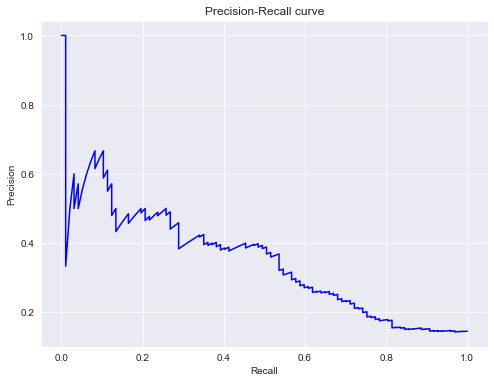

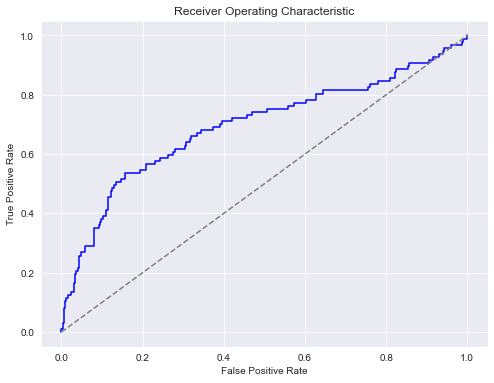

In [62]:
# Build a logistic regression model, ensure feature selection (lasso (l1 regularization)) and... 
#... class imbalance (class_weight) are addressed in the model. Random state parameter included for reproducibility.

# Instatiate the logistic regression model with the required parameters
log_reg = LogisticRegression(class_weight = 'balanced', penalty='l1', solver= 'liblinear', random_state =42)


# Fit the model on the training data to learn patterns in the training data
log_reg.fit(X_train_final, y_train_final)


# Evaluate the model's performance with the test set on predicting y, from the X_test_final
y_pred = log_reg.predict(X_test_final)


# Metrics of evaluation
# A confusion matrix of the actual y values and the predicted y values
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred))
print('\n')
# A classification report with a detailed report on the metrics of our model 
print("Classification Report:\n", classification_report(y_test_final, y_pred))


# AUC-ROC Curve
y_pred_prob = log_reg.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_prob)
print('\n')
print("AUC-ROC:", roc_auc)



# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_final, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()
print('\n')


# ROC Curve
fpr, tpr, _ = roc_curve(y_test_final, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

###### INTERPRETATION OF THE BASELINE MODEL
**Confusion Matrix**

True Negatives (TN): 413
The model correctly predicted 413 non-churners (class 0) as non-churners.

False Positives (FP): 157
The model incorrectly predicted 157 non-churners as churners.

False Negatives (FN): 38
The model incorrectly predicted 38 churners as non-churners.

True Positives (TP): 59
The model correctly predicted 59 churners (class 1) as churners.


**Classification Report**
Explanation of Metrics:
Precision:

For class 1 (churn), precision is 0.27, meaning that only 27% of the predictions labeled as churn are actually churners. This indicates a high number of false positives (157).
For class 0 (non-churn), precision is 0.92, meaning the model is highly accurate when predicting non-churn.
Recall (Sensitivity):

For class 1 (churn), recall is 0.61, meaning the model correctly identifies 61% of churners in the dataset.
For class 0 (non-churn), recall is 0.72, meaning the model correctly identifies 72% of non-churners.
F1-Score:

The F1-score is the harmonic mean of precision and recall.
For class 1 (churn), F1-score is 0.38, which is low, indicating poor balance between precision and recall for predicting churn.
For class 0 (non-churn), F1-score is 0.81, which is strong.
Overall Accuracy:
The model achieves an accuracy of 71%, but since the dataset is imbalanced, accuracy alone is not a reliable metric.

Macro Average:
The average metric values across both classes (unweighted).

Macro F1-score is 0.59, showing that the model struggles with class 1 (churn).
Weighted Average:
The average metric values weighted by the support (number of instances in each class).

Weighted F1-score is 0.75, influenced heavily by the majority class (non-churn).


**AUC-ROC: 0.694**
The AUC-ROC score is 0.694, which is decent but not excellent.
An AUC-ROC closer to 1.0 indicates a better distinction between classes, while a score near 0.5 indicates random guessing.
This suggests the model has moderate discriminatory power in distinguishing churners from non-churners.

Area Under the Curve (AUC-ROC):
AUC-ROC measures the area under the ROC curve and provides a single number summarizing the model's performance.
Interpretation of AUC-ROC:
1.0: Perfect model.
0.7–0.9: Good model.
0.5–0.7: Poor model.



**Key Observations:**
**Strengths:**
The model is strong at identifying non-churners (class 0), as seen from the high precision (92%) and F1-score (81%) for this class.
Recall for churners (class 1) is relatively decent (61%), meaning it captures most of the churners.


**Weaknesses:**
Precision for churners (class 1) is very low (27%), meaning a significant portion of the churn predictions are incorrect.
The F1-score for churners (38%) reflects poor balance between precision and recall for this minority class.
Class imbalance is still affecting the model's performance, as the majority class dominates the metrics.


**Performance Evaluation:**
Overall: The model’s performance is medium, with room for improvement. It can identify churners reasonably well but struggles with precision for churn predictions.


**Action Points:**
Address the low precision for churners by further tuning the model or trying additional methods like oversampling the minority class (e.g., SMOTE).
Consider experimenting with hyperparameter tuning for the logistic regression model to improve performance.
Evaluate alternative models (e.g., decision trees) to see if they handle the imbalance better.


**Next Steps:**
Hyperparameter Tuning: Improve this logistic regression model with regularization strength (C) and other parameters.
Alternative Models: Test decision tree classifiers, which might better handle the imbalance and non-linear relationships.
Revisit Class Balancing Techniques: Try oversampling, undersampling, or synthetic techniques (SMOTE).
Actionable Insights: Investigate the features driving churn predictions (coefficients in logistic regression) to provide actionable insights for the stakeholders.


**Interpreting Precision-Recall Curve**

The **precision-recall (PR) curve** is a graphical representation of the tradeoff between precision (positive predictive value) and recall (sensitivity) for different thresholds of classification. It is particularly useful when dealing with imbalanced datasets, as it focuses on the positive (minority) class.

 **Key Components**:
- **Precision**: The proportion of true positives among all predicted positives.
- **Recall**: The proportion of true positives among all actual positives.

**How to Interpret**:
1. **Curve Shape**:
   - A PR curve closer to the top-right corner indicates better model performance.
   - A model that randomly guesses would produce a horizontal line at the level of the baseline precision, which equals the proportion of positive instances in the dataset.

2. **Precision-Recall Tradeoff**:
   - As recall increases, precision typically decreases. This happens because, to capture more positives (increase recall), the model starts predicting more instances as positive, increasing false positives.
   - A sharp drop in precision as recall increases indicates the model struggles with making accurate predictions when trying to capture all positives.

3. **Area Under the Curve (AUC-PR)**:
   - A higher AUC-PR value indicates better model performance.
   - This metric is more informative than ROC-AUC in imbalanced datasets because it focuses on the minority class.

4. **Choosing a Threshold**:
   - Use the PR curve to determine a threshold that balances precision and recall based on the problem's needs. For example:
     - High precision might be necessary if false positives are costly.
     - High recall might be necessary if missing true positives is unacceptable.

---

**Interpreting ROC Curve**

The **receiver operating characteristic (ROC) curve** plots the true positive rate (TPR or recall) against the false positive rate (FPR) for different classification thresholds. It evaluates the model's ability to distinguish between classes.

 **Key Components**:
- **True Positive Rate (TPR / Recall)**: The proportion of actual positives correctly predicted as positives.
- **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly predicted as positives.

**How to Interpret**:
1. **Curve Shape**:
   - An ideal model has a curve that hugs the top-left corner, indicating high TPR and low FPR.
   - A random model (guessing) produces a diagonal line from (0,0) to (1,1), with an AUC-ROC of 0.5.

2. **Area Under the Curve (AUC-ROC)**:
   - AUC-ROC measures the area under the ROC curve and provides a single number summarizing the model's performance.
   - **Interpretation of AUC-ROC**:
     - **1.0**: Perfect model.
     - **0.7–0.9**: Good model.
     - **0.5–0.7**: Poor model.
     - **0.5**: Random guessing.

3. **Threshold Selection**:
   - The ROC curve helps select a threshold based on the tradeoff between TPR and FPR.
   - For example:
     - A low threshold increases TPR (recall) but also FPR.
     - A high threshold reduces FPR but might miss true positives, lowering TPR.

4. **Imbalanced Data**:
   - ROC curves can be misleading in imbalanced datasets because they consider both classes equally. In such cases, the PR curve is more informative.

---

**Key Differences Between PR and ROC Curves**
- **Focus**:
  - PR curves focus on the positive (minority) class and are better for imbalanced datasets.
  - ROC curves evaluate the performance across both classes.
- **Interpretation in Imbalanced Data**:
  - A high AUC-ROC may not mean the model is good at predicting the minority class because FPR is dominated by the majority class.
  - A high AUC-PR explicitly indicates good performance on the minority class.

---

 **Summary**
- Use the **PR curve** to evaluate the model’s ability to handle the minority class (churn, in your case).
- Use the **ROC curve** for a broader assessment of class discrimination.
- Choose a decision threshold that aligns with your business or problem-specific goals, balancing precision and recall.

### OPTIMIZATION 1

In [63]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [64]:
# Address the class imbalance

# Initialize SMOTE with random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE to create synthetic data for the minority training data (y)
X_train_smot, y_train_smot = smote.fit_resample(X_train_final, y_train_final)

# Confirm the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smot.value_counts())

Class distribution after SMOTE:
1    2280
0    2280
Name: churn, dtype: int64


Above, we've dealt with the class imbalance by creating synthetic data for the minority class using SMOTE. As seen in the output above, the distribution of the values after SMOTE is now ideal.

In [65]:
# Hyperparameter Tuning
# We’ll include cross-validation to find the best hyperparameters.

# Instatiate the logistic regression model (use d l2 regularization & class weight from the baseline)
log_reg = LogisticRegression( class_weight='balanced', penalty='l2' , solver='liblinear', random_state=42)


# Set up hyperparameter grid that'll help identify the best hyperparameters for the model
param_grid = param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Use a pipeline to bundle up all these processes into a single object that can be called later.  
pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('log_reg', log_reg)])


# Use GridSearchCV to find the best hyperparameter combo with cross validation
grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'log_reg__C': param_grid['C']},
    cv = 5,   #five-fold cross validation
    scoring = 'roc_auc',
    n_jobs=-1
)

In [66]:
# Train the model
# grid_search contain our model, the pipeline with the processing steps, and the parameter grid. So we fit the grid search..
#... to the training model.
grid_search.fit(X_train_final, y_train_final)


# Get the best model
best_model = grid_search.best_estimator_


# Best hyperparameter value
print("Best regularization strength (C):", grid_search.best_params_)

Best regularization strength (C): {'log_reg__C': 0.01}


Confusion Matrix:
 [[403 167]
 [ 37  60]]


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       570
           1       0.26      0.62      0.37        97

    accuracy                           0.69       667
   macro avg       0.59      0.66      0.58       667
weighted avg       0.82      0.69      0.74       667



AUC-ROC: 0.6867788026767949




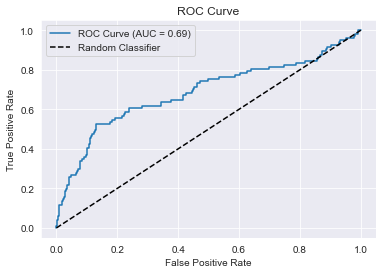

In [67]:
# Evaluation of the optimized model

# Predict the test set
y_pred = best_model.predict(X_test_final)
y_pred_prob = best_model.predict_proba(X_test_final)[:, 1]


# Confusion Matrix
conf_matrix = confusion_matrix(y_test_final, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print('\n')


# Classification Report
class_report = classification_report(y_test_final, y_pred)
print("Classification Report:\n", class_report)
print('\n')


# AUC-ROC
roc_auc = roc_auc_score(y_test_final, y_pred_prob)
print("AUC-ROC:", roc_auc)
print('\n')



# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### OPTIMIZATION 2

In [68]:
# Initialize ADASYN with random state for reproducibility
adasyn = ADASYN(random_state=42)

# Fit ADASYN to create synthetic data for the minority training data (y)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_final, y_train_final)

# Confirm the new class distribution
print("Class distribution after ADASYN:")
print(y_train_adasyn.value_counts())

Class distribution after ADASYN:
1    2321
0    2280
Name: churn, dtype: int64


In [69]:
# Initialize Logistic Regression
log_reg = LogisticRegression(
    class_weight='balanced', penalty='l2', solver='liblinear', random_state=42
)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization strengths
}

# Define pipeline with ADASYN
pipeline = Pipeline(steps=[
    ('adasyn', ADASYN(random_state=42)),  # Apply ADASYN during training
    ('log_reg', log_reg)  # Logistic Regression model
])

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={'log_reg__C': param_grid['C']},
    cv=5,  # Five-fold cross-validation
    scoring='roc_auc',  # Use AUC-ROC as the evaluation metric
    verbose=1,
    n_jobs=-1
)

# Train the model
grid_search.fit(X_train_final, y_train_final)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_model.predict(X_test_final)
y_pred_prob = best_model.predict_proba(X_test_final)[:, 1]

# Metrics and evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

conf_matrix = confusion_matrix(y_test_final, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test_final, y_pred)
print("Classification Report:\n", class_report)

roc_auc = roc_auc_score(y_test_final, y_pred_prob)
print("AUC-ROC:", roc_auc)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.9s finished


Confusion Matrix:
 [[364 206]
 [ 34  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       570
           1       0.23      0.65      0.34        97

    accuracy                           0.64       667
   macro avg       0.57      0.64      0.55       667
weighted avg       0.82      0.64      0.69       667

AUC-ROC: 0.6861276903599204


### DECISION TREE

Confusion Matrix:
 [[488  82]
 [ 66  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       570
           1       0.27      0.32      0.30        97

    accuracy                           0.78       667
   macro avg       0.58      0.59      0.58       667
weighted avg       0.79      0.78      0.78       667

AUC-ROC: 0.5878639898715862


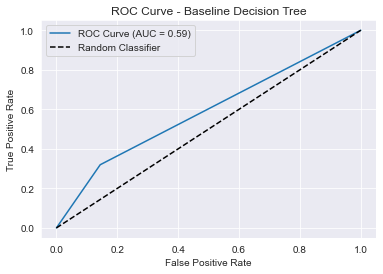

In [70]:
# Initialize a simple Decision Tree
dt_baseline = DecisionTreeClassifier(random_state=42)

# Train on the training data
dt_baseline.fit(X_train_final, y_train_final)

# Predict on the test set
y_pred = dt_baseline.predict(X_test_final)
y_pred_prob = dt_baseline.predict_proba(X_test_final)[:, 1]

# Evaluate the baseline Decision Tree
conf_matrix = confusion_matrix(y_test_final, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test_final, y_pred)
print("Classification Report:\n", class_report)

roc_auc = roc_auc_score(y_test_final, y_pred_prob)
print("AUC-ROC:", roc_auc)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Decision Tree')
plt.legend()
plt.show()

### OPTIMIZED DECISION TREE

In [71]:
# Initialize the Decision Tree with default settings
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'class_weight': [None, 'balanced']
}

# Perform Grid Search
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search_dt.fit(X_train_final, y_train_final)

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Best hyperparameter combination
print("Best Hyperparameters:", grid_search_dt.best_params_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1235 out of 1250 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   11.6s finished


Best Hyperparameters: {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}


Confusion Matrix:
 [[552  18]
 [ 71  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       570
           1       0.59      0.27      0.37        97

    accuracy                           0.87       667
   macro avg       0.74      0.62      0.65       667
weighted avg       0.84      0.87      0.84       667

AUC-ROC: 0.7024326279616568


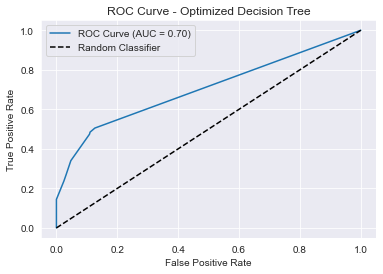

In [72]:
# Predict on the test set
y_pred_optimized = best_dt.predict(X_test_final)
y_pred_prob_optimized = best_dt.predict_proba(X_test_final)[:, 1]

# Confusion Matrix
conf_matrix_optimized = confusion_matrix(y_test_final, y_pred_optimized)
print("Confusion Matrix:\n", conf_matrix_optimized)

# Classification Report
class_report_optimized = classification_report(y_test_final, y_pred_optimized)
print("Classification Report:\n", class_report_optimized)

# AUC-ROC
roc_auc_optimized = roc_auc_score(y_test_final, y_pred_prob_optimized)
print("AUC-ROC:", roc_auc_optimized)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_prob_optimized)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_optimized:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Decision Tree')
plt.legend()
plt.show()

## MODELS COMPARISON

In [73]:
# Compare the performance of the logistic reg and decision tree

# DISCUSSION ON THE FINAL MODEL

Provide 1-3 paragraphs discussing the final model.
Explore; 
- model features and preprocessing approach
- the diff kinds of models built
- diff model hyperparameters and the tuning
- ENSURE TO COMMUNICATE THE PERFORMANCE & INSIGHTS GENERATED BY THE ML MODELS

## RECOMMENDATIONS

In [74]:
#POINT FORM (discussion in paragraphs will be in the report)
#PREDICTIVE FINDINGS & PREDICTIVE RECOMMENDATIONS
#GIVE SUGGESTIONS BASED ON FINDNGS (ANALYSIS & MODELING)
#GIVE SUGGESTION BASED ON CHALLENGES FACED (e.g we need to collect more data, check locations etc)

## CONCLUSION

In [75]:
# Brief (more explanation in the data report)
#WHAT ARE YOUR FINDINGS FROM THE ANALYSIS & MODELING?
#ANSWERS EVERYTHING IN YOUR OBJECTIVES

## NEXT STEPS

In [76]:
# POINT-FORM, BRIEF (more discussion in the report)
#DISCUSS DEPLOYMENT OF THE MODEL FOR ACCESS TO END USERS
# COLLECT MORE DATA POINTS